Performing the required imports

In [46]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [3]:
device="cuda" if torch.cuda.is_available() else "cpu"
print("The device is {0}".format(device))

The device is cuda


Extracting the data

In [4]:
training_set=torchvision.datasets.CIFAR10(root="./data",train=True,download=True,
                                          transform=transforms.ToTensor())
testing_set=torchvision.datasets.CIFAR10(root="./data",train=False,download=True,
                                          transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Loading the data (Data Loader)

In [36]:
train_loader=torch.utils.data.DataLoader(training_set,batch_size=70,shuffle=True
                                         ,num_workers=2,pin_memory=True,
                                         drop_last=True)
test_loader=torch.utils.data.DataLoader(testing_set,batch_size=1,shuffle=False)

In [6]:
num_of_pixels=32*32*3
dropout=nn.Dropout(0.3)

Defining a modular neural network

In [7]:
class Neural_Net(nn.Module):
  def __init__(self):
    super(Neural_Net,self).__init__()
    self.hidden1=nn.Linear(num_of_pixels,256)
    self.hidden2=nn.Linear(256,128)
    self.output=nn.Linear(128,10)

  def forward(self,x):
    x=F.relu(self.hidden1(x))
    x=dropout(x)
    x=F.relu(self.hidden2(x))
    x=dropout(x)
    x=F.softmax(self.output(x))
    return x

model=Neural_Net()

In [8]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01,weight_decay=0.0001,
                          momentum=0.9)

Verifying the model

In [9]:
print(model)

Neural_Net(
  (hidden1): Linear(in_features=3072, out_features=256, bias=True)
  (hidden2): Linear(in_features=256, out_features=128, bias=True)
  (output): Linear(in_features=128, out_features=10, bias=True)
)


Training the model

In [14]:
num_of_epochs=400
count=0
for epoch in range(num_of_epochs):
  correct=0
  for images, labels in train_loader:
    count+=1
    input_image=images.view(-1,num_of_pixels)
    outputs=model(input_image)
    loss=loss_function(outputs,labels)
    # Back prop
    optimizer.zero_grad()
    loss.backward()
    # Update weights (optimize)
    optimizer.step()
    # Evaluating the performance
    predictions=torch.max(outputs,1)[1]
    correct+=(predictions==labels).sum().numpy()

  if((epoch)%20==0):
    print("Epoch is: {0}, Loss is {1} and Accuracy is: {2}".format(epoch+1,loss.data,100*correct/len(train_loader.dataset)))

print("Finished Training")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Epoch is: 1, Loss is 2.0152835845947266 and Accuracy is: 39.602
Epoch is: 21, Loss is 1.9608254432678223 and Accuracy is: 45.12
Epoch is: 41, Loss is 2.0034263134002686 and Accuracy is: 48.13
Epoch is: 61, Loss is 2.0124564170837402 and Accuracy is: 49.824
Epoch is: 81, Loss is 1.9444211721420288 and Accuracy is: 51.674
Epoch is: 101, Loss is 2.049619436264038 and Accuracy is: 52.438
Epoch is: 121, Loss is 1.9139920473098755 and Accuracy is: 53.456
Epoch is: 141, Loss is 1.8799662590026855 and Accuracy is: 53.962
Epoch is: 161, Loss is 1.7413971424102783 and Accuracy is: 54.936
Epoch is: 181, Loss is 1.8663212060928345 and Accuracy is: 55.71
Epoch is: 201, Loss is 1.840824007987976 and Accuracy is: 56.19
Epoch is: 221, Loss is 1.8995040655136108 and Accuracy is: 56.538
Epoch is: 241, Loss is 1.9262555837631226 and Accuracy is: 57.35
Epoch is: 261, Loss is 2.0203959941864014 and Accuracy is: 57.042
Epoch is: 281, Loss is 1.8360360860824585 and Accuracy is: 57.926
Epoch is: 301, Loss is 

Checking the performance on test set

In [42]:
iteration_list = []
accuracy_list = []
prediction_list = []
label_list = []

with torch.no_grad():
  total = 0
  correct = 0
  for images, labels in test_loader:
    label_list.append(labels.numpy()[0])
    model.eval()

    test = images.view(-1, num_of_pixels)
    outputs = model(test)
    predictions = torch.max(outputs, 1)[1]
    prediction_list.append(predictions.numpy()[0])
    correct += (predictions == labels).sum().numpy()
    total += len(labels)

  iteration_list.append(count)
  print(f'Iteration: {count:5d}, Loss:{loss.data:.4f}, Final Accuracy:{correct*100/total:.3f}%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Iteration: 287028, Loss:1.9119, Final Accuracy:50.050%


Generating the confusion matrix

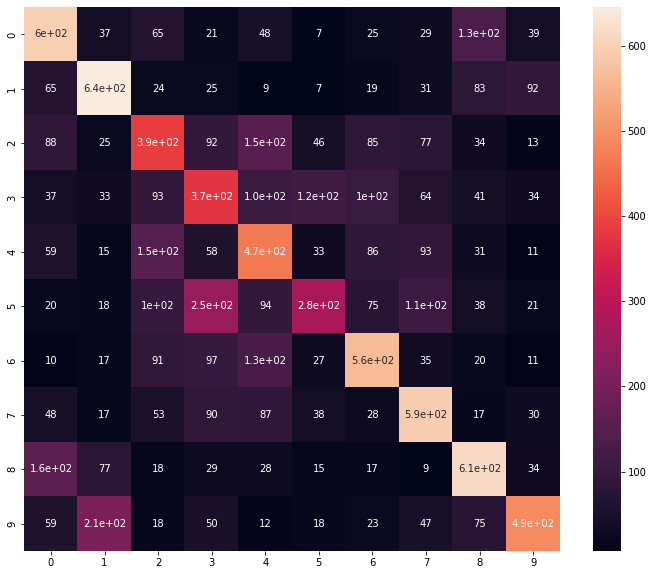

In [48]:
confusion_matrix=metrics.confusion_matrix(label_list,prediction_list)
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix,annot=True)

##### For class 0, it is most likely to be confused with class 8
##### For class 1, it is most likely to be confused with class 9
##### For class 2, it is most likely to be confused with class 4
##### For class 3, it is most likely to be confused with class 5
##### For class 4, it is most likely to be confused with class 2
##### For class 5, it is most likely to be confused with class 3
##### For class 6, it is most likely to be confused with class 4
#####For class 7, it is most likely to be confused with class 3
##### For class 8, it is most likely to be confused with class 0
##### For class 9, it is most likely to be confused with class 1

Class 0 and 8 are most likely to be confused overall